<h2>Face Recognition using Principal Component Analysis</h2>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm_notebook as tqdm
import random

In [2]:
label = -1

train_images = []
train_labels = []

for i in os.listdir('images/'):
    label+=1
    for nm in os.listdir('images/'+i):
        img = cv2.imread('images/'+i+'/'+nm, 0)
        img = np.ravel(img)
        train_images.append(img)
        train_labels.append(label)

c = list(zip(train_images, train_labels))
random.shuffle(c)
train_images, train_labels = zip(*c)

train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [3]:

idx = int(len(train_images)*.7)
test_images = train_images[:][idx:]
test_labels = train_labels[idx:]

train_images = train_images[:][:idx]
train_labels = train_labels[:idx]

train_images = np.transpose(train_images)

print(f"Shape of train images : {train_images.shape}")
print(f"Total test images : {test_labels.shape}")

Shape of train images : (14400, 280)
Total test images : (120,)


<h3>Steps</h3>
<ol>
    <li> Mean Face </li>
    <li> Co-Variance of the Mean aligned faces </li>
</ol>


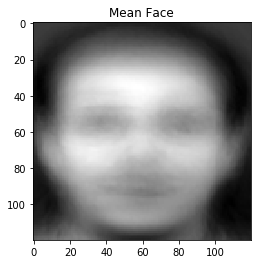

Shape of cov matrix : (280, 280)


In [4]:
mn = np.mean(train_images, axis = 1)
mn = np.reshape(mn, [120, 120])
plt.imshow(mn, cmap='gray')
plt.title('Mean Face')
plt.show()
train_mean = np.mean(train_images, axis=1)
train_mean = np.reshape(train_mean, (train_mean.shape[0], 1))
delta = train_images - train_mean
cov = np.cov(delta.T)
print(f"Shape of cov matrix : {cov.shape}")

<h3>Steps</h3>
<ol>
    <li> Eigenvalue and eigenvector decomposition: </li>
    <li> Co-Variance of the Mean aligned faces </li>
    <li> Generation of feature vectors </li>
    <li> Generating Eigenfaces </li>
    <li> Generating Eigenfaces </li>
   <li> Generate Signature of Each Face </li>
    <li> Test on test dataset </li>
</ol>


In [5]:

k_values = []
acc = []

for k in tqdm(range(1, 100, 2)):
    
    # Calculation of Eigen vectors, values
    eig_values, eig_vectors = np.linalg.eig(cov)
    eig_values *= -1
    
    # Feature vector, Signature of each face
    idx = np.argpartition(eig_values, k)
    ev = eig_vectors[idx[:k]]
    eig_faces = np.dot(ev, delta.T)
    sig = np.dot(eig_faces, delta)
    
    # Testing
    count = 0
    for j in range(test_labels.shape[0]):
        image = test_images[j]
        image = image - np.mean(train_images, axis=1)
        proj_test_face = np.dot(eig_faces, image)

        dist = []
        for i in range(sig.shape[1]):
            dist.append(np.linalg.norm(proj_test_face - sig[:,i]))

        index = np.where(dist == np.amin(dist))
        index = index[0]

        if train_labels[index] == test_labels[j]:
            count+=1

    acc.append(count*100/ test_labels.shape[0])
    k_values.append(k)

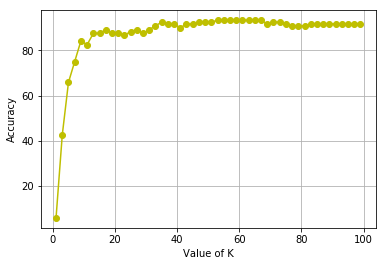

Accuracy: 93.33333333333333 at k = 53


In [6]:
import matplotlib.pyplot as plt

plt.plot(k_values, acc, '-yo')
plt.grid()
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

print(f"Accuracy: {max(acc)} at k = {k_values[acc.index(max(acc))]}")